In [2]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('..')

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("data/semi_expts.csv")
data_1 = pd.read_csv("data/expts.csv")

In [22]:
data_1

,Name,val_joint_coherence,val_cross_coherence_m_s,val_cross_coherence_s_m,val_s_probe,datamodule_args/paired_prop,fusion_module
0,vaevae_4,0.5047,0.74944,0.66652,0.69706,1.0,models.SetTransformer
1,vaevae_0,0.3960,0.56872,0.50118,0.53316,1.0,models.PoE_Encoder


In [20]:
data_1.loc[0, 'datamodule_args/paired_prop'] = 1.0
data_1.loc[1, 'datamodule_args/paired_prop'] = 1.0
data_1.loc[1, 'fusion_module'] = 'models.PoE_Encoder'

In [7]:
data

,Name,val_joint_coherence,val_cross_coherence_m_s,val_cross_coherence_s_m,val_s_probe,datamodule_args/paired_prop,fusion_module
0,semi_vaevae_9,0.4083,0.61370,0.33612,0.41024,0.3,models.SetTransformer
1,semi_vaevae_8,0.3386,0.46210,0.39540,0.44796,0.3,models.PoE_Encoder
2,semi_vaevae_5,0.4736,0.69178,0.54080,0.58042,0.5,models.SetTransformer
3,semi_vaevae_3,0.3761,0.53164,0.43266,0.47372,0.5,models.PoE_Encoder
4,semi_vaevae_4,0.2229,0.31176,0.19864,0.21678,0.1,models.SetTransformer
5,semi_vaevae_2,0.1971,0.26018,0.21564,0.25890,0.1,models.PoE_Encoder


In [25]:
comb_data = pd.concat([data, data_1], axis=0)

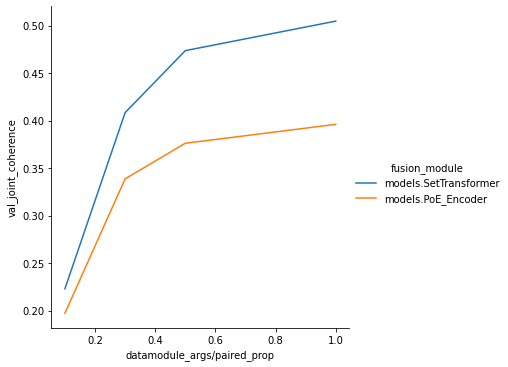

In [31]:
joint = comb_data[['val_joint_coherence', 'datamodule_args/paired_prop', 'fusion_module']]
sns.relplot(
    x='datamodule_args/paired_prop', 
    y='val_joint_coherence', 
    hue='fusion_module',
    kind='line', 
    data=joint
)

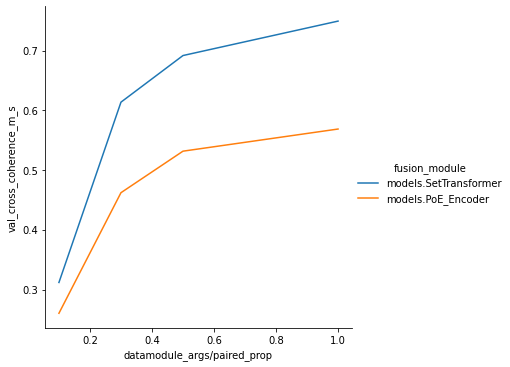

In [29]:
cross_m_s = comb_data[['val_cross_coherence_m_s', 'datamodule_args/paired_prop', 'fusion_module']]
sns.relplot(
    x='datamodule_args/paired_prop', 
    y='val_cross_coherence_m_s', 
    hue='fusion_module',
    kind='line', 
    data=cross_m_s
)

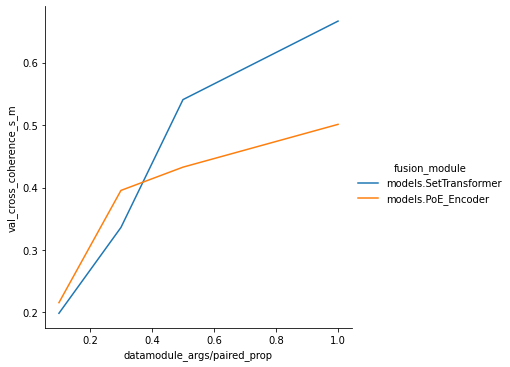

In [32]:
cross_s_m = comb_data[['val_cross_coherence_s_m', 'datamodule_args/paired_prop', 'fusion_module']]
sns.relplot(
    x='datamodule_args/paired_prop', 
    y='val_cross_coherence_s_m', 
    hue='fusion_module',
    kind='line', 
    data=cross_s_m
)

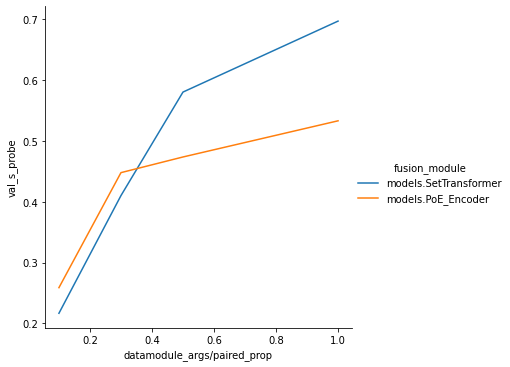

In [34]:
s_probe = comb_data[['val_s_probe', 'datamodule_args/paired_prop', 'fusion_module']]
sns.relplot(
    x='datamodule_args/paired_prop', 
    y='val_s_probe', 
    hue='fusion_module',
    kind='line', 
    data=s_probe
)